In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import sparse
np.set_printoptions(threshold=np.inf)

# Basaltic dike in country rocks

In [3]:
# Globals
T0 = 300 #uR
T1 = 1200 #uL
alpha = 10**(-6)
W = 5
L = 100
N = 100
dx = L/(2*N) #step - 1/N multipied by length in one direction
dt = 3600*24 #day
l = (alpha*dt)/dx**2 #lambda

In [18]:
def T(x): 
    """Fill initial values of Temperature at time 0 in all positions"""
    starting_u = np.zeros(x.size)
    for i in range(len(x)):
        if abs(x[i])<(W/2): 
            starting_u[i] = T1
        else: starting_u[i] = T0
    return starting_u

In [19]:
x = np.arange(-L/2, L/2, dx)
t_max = dt*10**5 #seconds
t = np.arange(0, t_max, dt) #vector of time
u = np.zeros(shape=(t.size, x.size)) # matrix for results
        
u[0] = T(x)
middle_point = int(x.size/2)

In [19]:
# Prepare tridiagonal matrix A from the lecture (here marked as M)
A = np.zeros(x.size)
B = np.zeros(x.size)
C = np.zeros(x.size)

A.fill(l)
B.fill(1-2*l)
C.fill(l)
B[0]=B[-1]=1
C[0]=0
A[-2]=0

diagonals = [B,A,C]
a = B.shape[0]
M = sparse.diags(diagonals, [0,-1,1], shape=(a,a)).toarray()

Calculcate $t_f$ needed for the dike to cool down to a temperature $\Delta T=10^{\circ}C$ higher then $T_0$

In [44]:
i=0
while not u[i+1][middle_point] < T0+10:
    u[i+1] = M.dot(u[i])
    i+=1
        
print(u[i][middle_point])
tf = i
print(f't_f = {t[tf]} seconds')

310.0007374045833
t_f = 2102371200 seconds


Plot the temperature distributions $T(x,t_i)$ for times $t_1=0.1t_f, t_2=0.25t_f, t_3=0.5t_f$ and $t_4=0.75t_f$

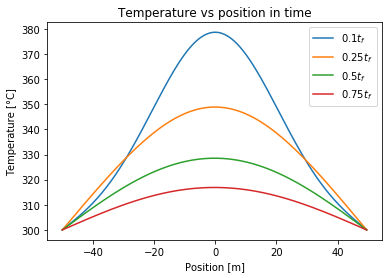

In [45]:
plt.plot(x, u[int(tf*0.1)], label='$0.1t_f$')
plt.plot(x, u[int(tf*0.25)], label='$0.25t_f$')
plt.plot(x, u[int(tf*0.5)], label='$0.5t_f$')
plt.plot(x, u[int(tf*0.75)], label='$0.75t_f$')
plt.legend()
plt.xlabel("Position [m]");
plt.ylabel("Temperature [°C]");
plt.title("Temperature vs position in time");
plt.show()

Record and plot the temperature evolution versus time at a distance of $5$ m from the dike--country rock contact. What is the maximum temperature the country rock experiences at this location and when is it reached?

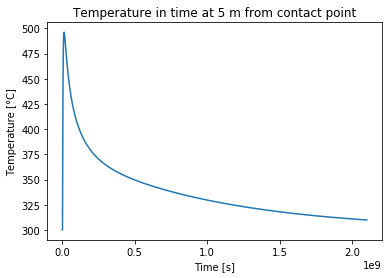

Maximal measure temperature is 496.25966118000633


In [64]:
distance = int(5/dx)+middle_point # 5m to the right from dike-rock contact

contact = np.zeros(tf)
for i in range(tf):
    contact[i] = u[i][distance]
    
plt.plot(t[:contact.size], contact)
plt.ylabel("Temperature [°C]")
plt.xlabel("Time [s]")
plt.title("Temperature in time at 5 m from contact point")
plt.show()
print(f'Maximal measure temperature is {contact.max()}')

# Crank-Nicolson